In [8]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from pprint import pprint

In [12]:
current_dir = Path.cwd()
work_dir = current_dir.parent
result_dir = f'{work_dir}/src/output'

In [57]:
datasets = ['cleveland', 'hungarian', 'switzerland', 'longbeach_va']

In [58]:
# Check results
with open(f'{result_dir}/{datasets[0]}_results.json') as f:
    d = json.load(f)
    print(pprint(d))

{'AdaBoost': {'results': {'accuracy': 0.9016393442622951,
                          'auroc': 0.9391163793103449,
                          'f1': 0.9016922263352722,
                          'precision': 0.9036841177507492,
                          'recall': 0.9016393442622951,
                          'specificity': 0.9310344827586207}},
 'DecisionTree': {'results': {'accuracy': 0.7213114754098361,
                              'auroc': 0.7160560344827587,
                              'f1': 0.7213114754098361,
                              'precision': 0.7248092142453363,
                              'recall': 0.7213114754098361,
                              'specificity': 0.7586206896551724}},
 'GaussianNB': {'results': {'accuracy': 0.8360655737704918,
                            'auroc': 0.9170258620689654,
                            'f1': 0.835889300193901,
                            'precision': 0.8429494003264495,
                            'recall': 0.8360655737704918,
 

# reading results for all experiments

In [59]:
metrics = ['accuracy', 'auroc', 'f1', 'precision', 'recall', 'specificity']
columns = ['dataset', 'model']
columns.extend(metrics)
df_results = pd.DataFrame(columns=columns)

In [60]:
for dataset in datasets:
    print(dataset)
    with open(f'{result_dir}/{dataset}_results.json') as f:
        d = json.load(f)
        for model_name in d.keys():
            row_data = [dataset]
            row_data.append(model_name)
            for metric in metrics:
                row_data.append(round(d[model_name]['results'][metric],2)) # round to 2 decimals
            df_results.loc[len(df_results)]  = row_data

cleveland
hungarian
switzerland
longbeach_va


In [61]:
df_results

,dataset,model,accuracy,auroc,f1,precision,recall,specificity
0,cleveland,XGBoost,0.87,0.96,0.87,0.88,0.87,0.93
1,cleveland,MLP,0.90,0.94,0.90,0.90,0.90,0.93
2,cleveland,LogisticRegression,0.90,0.94,0.90,0.90,0.90,0.90
3,cleveland,DecisionTree,0.72,0.72,0.72,0.72,0.72,0.76
4,cleveland,KNeighbors,0.69,0.74,0.69,0.70,0.69,0.76
5,cleveland,GaussianNB,0.84,0.92,0.84,0.84,0.84,0.90
6,cleveland,RandomForest,0.90,0.94,0.90,0.91,0.90,0.97
7,cleveland,AdaBoost,0.90,0.94,0.90,0.90,0.90,0.93
8,cleveland,SVC,0.48,0.50,0.31,0.23,0.48,1.00
9,hungarian,XGBoost,0.83,0.92,0.83,0.83,0.83,0.92


In [98]:
df_results.to_csv(f'{result_dir}/full_rusult.csv', index=False)

In [63]:
cleveland_result = df_results[df_results['dataset'] == 'cleveland']

In [64]:
cleveland_result


,dataset,model,accuracy,auroc,f1,precision,recall,specificity
0,cleveland,XGBoost,0.87,0.96,0.87,0.88,0.87,0.93
1,cleveland,MLP,0.90,0.94,0.90,0.90,0.90,0.93
2,cleveland,LogisticRegression,0.90,0.94,0.90,0.90,0.90,0.90
3,cleveland,DecisionTree,0.72,0.72,0.72,0.72,0.72,0.76
4,cleveland,KNeighbors,0.69,0.74,0.69,0.70,0.69,0.76
5,cleveland,GaussianNB,0.84,0.92,0.84,0.84,0.84,0.90
6,cleveland,RandomForest,0.90,0.94,0.90,0.91,0.90,0.97
7,cleveland,AdaBoost,0.90,0.94,0.90,0.90,0.90,0.93
8,cleveland,SVC,0.48,0.50,0.31,0.23,0.48,1.00


In [85]:
def plot_results_bar(df, dataset_name, metric):
    ds_df = df[df['dataset'] == dataset_name.lower()]
    ax = sns.barplot(x=metric.lower(), y='model', data=ds_df, errorbar=None)
    ax.set(xlim=(0, 1))
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'{dataset_name} - {metric}')
    plt.show()

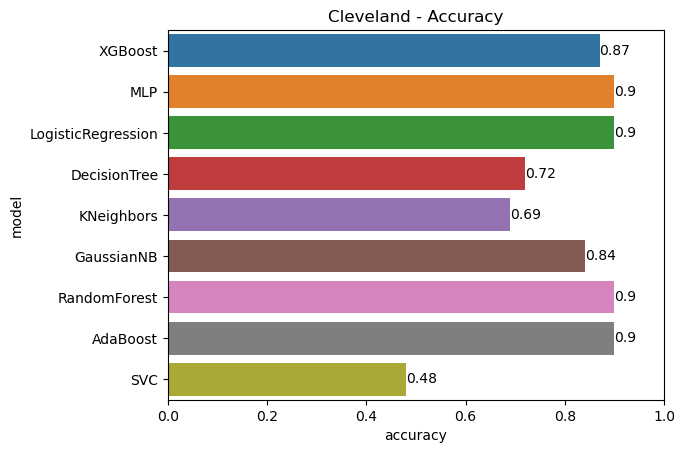

In [94]:
plot_results_bar(df_results, "Cleveland", "Accuracy")

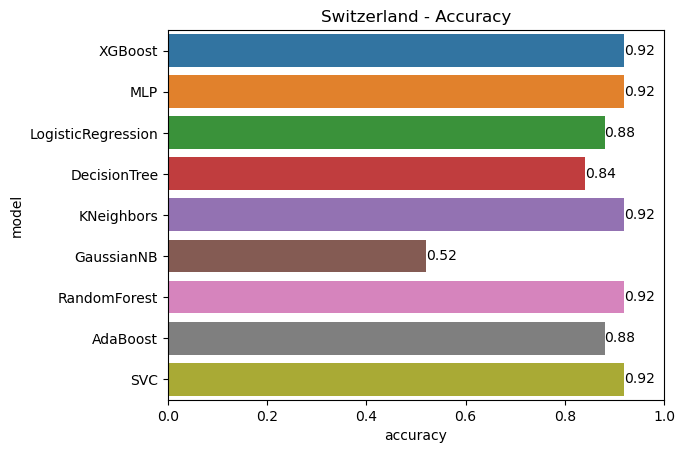

In [95]:
plot_results_bar(df_results, "Switzerland", "Accuracy")

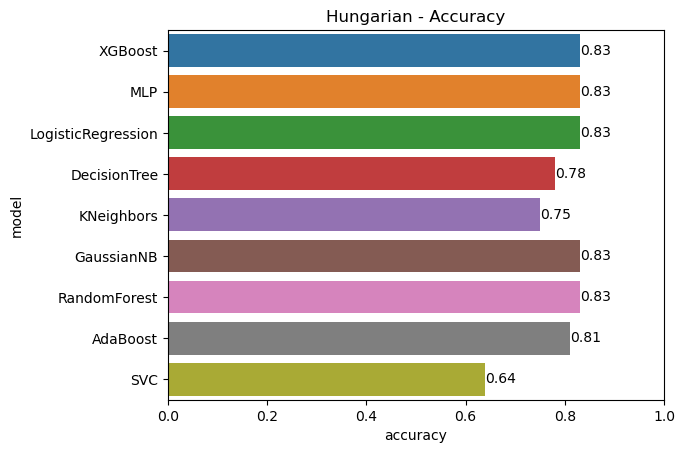

In [96]:
plot_results_bar(df_results, "Hungarian", "Accuracy")

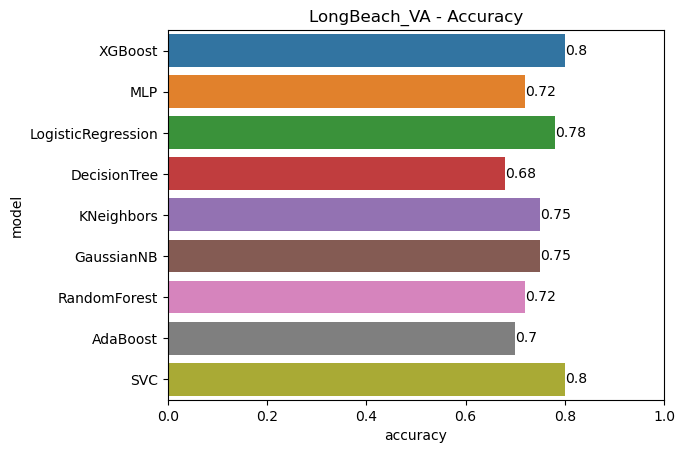

In [97]:
plot_results_bar(df_results, "LongBeach_VA", "Accuracy")